<a href="https://colab.research.google.com/github/abbasatayee/collab/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
dataset_path = kagglehub.dataset_download('grouplens/movielens-20m-dataset')

print('Data source import complete.')
print(dataset_path)

Data source import complete.
/kaggle/input/movielens-20m-dataset


In [2]:
import pandas as pd
import os

os.listdir('/kaggle/input/movielens-20m-dataset')

['rating.csv',
 'link.csv',
 'genome_tags.csv',
 'genome_scores.csv',
 'tag.csv',
 'movie.csv']

In [3]:
directory = os.listdir('/kaggle/input/movielens-20m-dataset')

for file in directory:
    print(file)

rating.csv
link.csv
genome_tags.csv
genome_scores.csv
tag.csv
movie.csv


In [4]:
# read rating.csv file
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
ratings.shape

(20000263, 4)

In [6]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
movies = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.shape

(27278, 3)

In [9]:
merged_data = ratings.merge(movies, on='movieId')
merged_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [10]:
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])
merged_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [11]:
merged_data['date'] = merged_data['timestamp'].dt.date
merged_data.head()

,userId,movieId,rating,timestamp,title,genres,date
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,2005-04-02
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,2005-04-02
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2005-04-02
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2005-04-02
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2005-04-02


In [12]:
merged_data.drop('timestamp', axis=1, inplace=True)
merged_data.head()

,userId,movieId,rating,title,genres,date
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,2005-04-02
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,2005-04-02
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2005-04-02
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2005-04-02
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2005-04-02


In [13]:
links = pd.read_csv('/kaggle/input/movielens-20m-dataset/link.csv')
merged_data_with_links = merged_data.merge(links , on='movieId')
merged_data_with_links.head()

,userId,movieId,rating,title,genres,date,imdbId,tmdbId
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,2005-04-02,113497,8844.0
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,2005-04-02,112682,902.0
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2005-04-02,114746,63.0
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2005-04-02,114369,807.0
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2005-04-02,114814,629.0


In [14]:
merged_data_with_links.shape

(20000263, 8)

In [17]:
merged_data_with_links['date'] = pd.to_datetime(merged_data_with_links['date'])
merged_data_with_links.head()

,userId,movieId,rating,title,genres,date,imdbId,tmdbId
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,2005-04-02,113497,8844.0
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,2005-04-02,112682,902.0
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2005-04-02,114746,63.0
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2005-04-02,114369,807.0
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2005-04-02,114814,629.0


In [18]:
merged_data_with_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   userId   int64         
 1   movieId  int64         
 2   rating   float64       
 3   title    object        
 4   genres   object        
 5   date     datetime64[ns]
 6   imdbId   int64         
 7   tmdbId   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ GB


In [19]:
merged_data_with_links['year'] = merged_data_with_links['date'].dt.year
merged_data_with_links.head()

,userId,movieId,rating,title,genres,date,imdbId,tmdbId,year
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,2005-04-02,113497,8844.0,2005
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,2005-04-02,112682,902.0,2005
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2005-04-02,114746,63.0,2005
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2005-04-02,114369,807.0,2005
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2005-04-02,114814,629.0,2005


In [21]:
merged_data_with_links.sort_values(by='year' , ascending=False , inplace=True)

merged_data_with_links.head()

,userId,movieId,rating,title,genres,date,imdbId,tmdbId,year
8163263,56257,3435,4.0,Double Indemnity (1944),Crime|Drama|Film-Noir,2015-03-06,36775,996.0,2015
13870568,95841,3863,3.5,"Cell, The (2000)",Drama|Horror|Thriller,2015-03-30,209958,8843.0,2015
13870577,95841,4725,3.5,Session 9 (2001),Horror|Thriller,2015-03-30,261983,10972.0,2015
13870618,95841,8644,4.0,"I, Robot (2004)",Action|Adventure|Sci-Fi|Thriller,2015-02-09,343818,2048.0,2015
13870664,95841,46976,3.5,Stranger than Fiction (2006),Comedy|Drama|Fantasy|Romance,2015-03-09,420223,1262.0,2015


In [27]:
subset_data = merged_data_with_links[(merged_data_with_links['year'] >= 2010) & (merged_data_with_links['year'] <= 2015)]

count = subset_data.shape[0]
print(f"Number of ratings from 2000 to 2015: {count}")

Number of ratings from 2000 to 2015: 3847547


In [28]:
subset_data.isna().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,0
date,0
imdbId,0
tmdbId,3291
year,0


In [29]:
subset_data.dropna(inplace=True)

/tmp/ipython-input-29-2384112000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.dropna(inplace=True)


In [30]:
subset_data.isna().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,0
date,0
imdbId,0
tmdbId,0
year,0


In [31]:
subset_data.isnull().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,0
date,0
imdbId,0
tmdbId,0
year,0


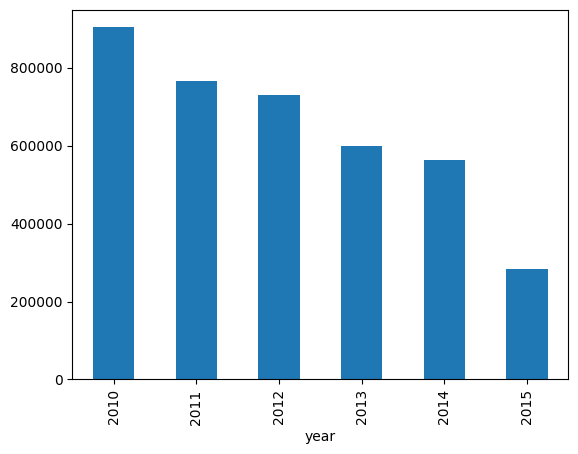

In [32]:
import matplotlib.pyplot as plt


subset_data['year'].value_counts().sort_index().plot(kind='bar')

plt.show()



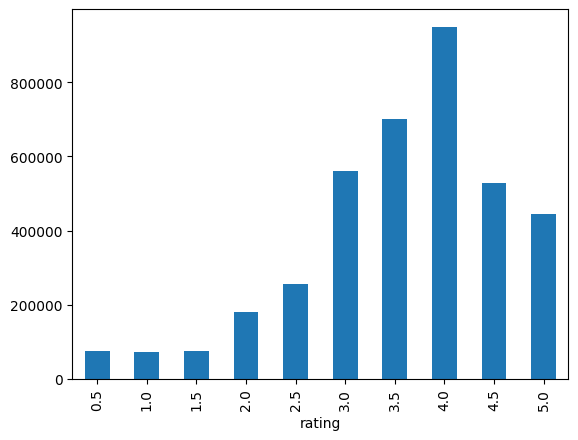

In [33]:
subset_data['rating'].value_counts().sort_index().plot(kind='bar')

plt.show()

In [34]:
subset_data.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'date', 'imdbId',
       'tmdbId', 'year'],
      dtype='object')

In [35]:
subset_data.drop(['date'] , inplace=True , axis=1)

/tmp/ipython-input-35-4218188145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.drop(['date'] , inplace=True , axis=1)


In [36]:
subset_data.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'imdbId', 'tmdbId',
       'year'],
      dtype='object')

In [39]:
final_data = subset_data[['userId','movieId','rating','title' , 'imdbId' , 'tmdbId']].copy()

In [40]:
final_data.shape

(3844256, 6)